# P3: Feature Selection 2 (Spearman Correlation Coefficient Method)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Preprocessing

In [4]:
df = pd.read_csv("../dataset/House_Price_Prediction.csv")
df.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-09-26,305000.0,2,1,False,76.18046,False,False,True,1,False,True,9,2
1,2014-05-14,498000.0,3,2,True,210.88981,False,False,False,2,True,True,5,2
2,2015-03-23,590000.0,2,4,False,262.91549,False,False,False,2,True,False,3,2
3,2014-07-15,775000.0,3,3,False,159.79316,False,False,False,1,True,False,7,3
4,2015-04-14,350000.0,2,1,False,92.90300,False,False,False,1,True,True,4,3


In [5]:
df = df.drop(columns=["date"])
df.head()

,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,305000.0,2,1,False,76.18046,False,False,True,1,False,True,9,2
1,498000.0,3,2,True,210.88981,False,False,False,2,True,True,5,2
2,590000.0,2,4,False,262.91549,False,False,False,2,True,False,3,2
3,775000.0,3,3,False,159.79316,False,False,False,1,True,False,7,3
4,350000.0,2,1,False,92.90300,False,False,False,1,True,True,4,3


In [6]:
boolean_columns = ["has_basement","renovated","nice_view","perfect_condition","has_lavatory","single_floor"]
for column in boolean_columns:
    df[column] = df[column].astype(int)
df.head()

,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,305000.0,2,1,0,76.18046,0,0,1,1,0,1,9,2
1,498000.0,3,2,1,210.88981,0,0,0,2,1,1,5,2
2,590000.0,2,4,0,262.91549,0,0,0,2,1,0,3,2
3,775000.0,3,3,0,159.79316,0,0,0,1,1,0,7,3
4,350000.0,2,1,0,92.90300,0,0,0,1,1,1,4,3


In [7]:
numerical_columns = ["price","bedrooms","grade","living_in_m2","real_bathrooms","month","quartile_zone"]
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,-0.819164,-0.347184,-1.562704,0,-1.540812,0,0,1,-1.060632,0,1,0.783480,-0.396180
1,0.108578,1.096722,-0.532991,1,0.431209,0,0,0,0.534124,1,1,-0.507230,-0.396180
2,0.550818,-0.347184,1.526433,0,1.192817,0,0,0,0.534124,1,0,-1.152585,-0.396180
3,1.440104,1.096722,0.496721,0,-0.316799,0,0,0,-1.060632,1,0,0.138125,0.537812
4,-0.602851,-0.347184,-1.562704,0,-1.296009,0,0,0,-1.060632,1,1,-0.829907,0.537812


In [8]:
X = df.drop(columns=["price"])
y = df["price"]

train_split = 0.8
train_index = int(train_split * len(df))

X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

## Computing Spearman Correlation

In [15]:
class LR:
    def __init__(self):
        self.c = None
        self.i = None
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        X = np.column_stack((np.ones(X.shape[0]),X))
        
        theta = np.linalg.inv(X.T @ X) @ X.T @ y
        
        self.i = theta[0]
        self.c = theta[1:]
        
    def predict(self, X):
        X = np.array(X)
        X = np.column_stack((np.ones(X.shape[0]),X))
        
        return X @ np.concatenate(([self.i], self.c))

In [16]:
correlations={}
for feature in X:
    corr,_= spearmanr(X[feature],y)
    correlations[feature] = corr
sortedcorr = sorted(correlations.items(), key = lambda x:x[1], reverse=True)
sortedcorr = np.array(sortedcorr)
print(sortedcorr)

[['quartile_zone' '0.7126243840032381']
 ['grade' '0.602237969267231']
 ['living_in_m2' '0.5878109663109318']
 ['real_bathrooms' '0.386633295381845']
 ['bedrooms' '0.2903431516613115']
 ['has_lavatory' '0.25318370444554683']
 ['nice_view' '0.21559317549823087']
 ['has_basement' '0.18187193413953467']
 ['renovated' '0.07941607316265162']
 ['perfect_condition' '0.055725247024247936']
 ['month' '-0.021436229391111027']
 ['single_floor' '-0.2964889798092856']]


In [20]:
sortedFeatures = sortedcorr[:,0]
bestmse = float('inf')
selectedFeatures = []
bestSubset = []
remainingFeatures = list(sortedFeatures)
mseScores = []
model = LR()

while remainingFeatures:
    feature = remainingFeatures[0]
    currFeatures = selectedFeatures + [feature]
    X_train_temp = X_train[currFeatures]
    X_test_temp = X_test[currFeatures]
    model.fit(X_train_temp, y_train)
    y_pred = model.predict(X_test_temp)
    mse = np.mean((y_pred - y_test)**2)
    selectedFeatures.append(feature)
    remainingFeatures.remove(feature)
    
    if mse < bestmse:
        bestmse = mse
        bestSubset = selectedFeatures
    print(f'Selected {feature} with MSE: {mse}')
    mseScores.append(mse)
    
bestSubset.sort()
print(bestSubset)

Selected quartile_zone with MSE: 0.5462550640011844
Selected grade with MSE: 0.33824481413781377
Selected living_in_m2 with MSE: 0.2798713452563452
Selected real_bathrooms with MSE: 0.2801613850180013
Selected bedrooms with MSE: 0.2794561074202941
Selected has_lavatory with MSE: 0.278622960276487
Selected nice_view with MSE: 0.25401586956833055
Selected has_basement with MSE: 0.2522668934967104
Selected renovated with MSE: 0.2493099730432861
Selected perfect_condition with MSE: 0.24516496290839176
Selected month with MSE: 0.2443949494278655
Selected single_floor with MSE: 0.2441264569884884
['bedrooms', 'grade', 'has_basement', 'has_lavatory', 'living_in_m2', 'month', 'nice_view', 'perfect_condition', 'quartile_zone', 'real_bathrooms', 'renovated', 'single_floor']


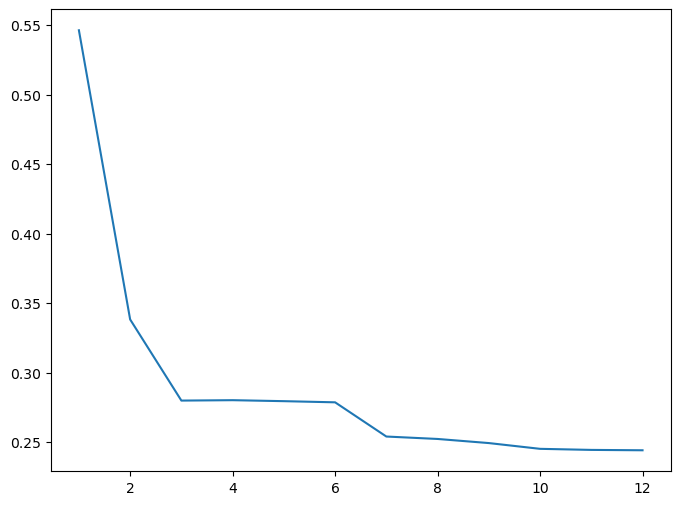

In [23]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(mseScores)+1), mseScores)
plt.show()